Projekt A
Ray launcher w moim pokoju

Konrad Kotlarz 147974

Przyjmij rozmiar pokoju według proporcji tzw. złotego podziału, tzn. boki pokoju mają długość 𝑎, 𝑏,
gdzie (a+b)/a = a/b. Na środku krótszej ściany (o długości 𝑎) zamontowałeś punkt dostępowy transmitujący
dla częstotliwości 5 GHz. Przyjmij charakterystykę anteny nadawczej i odbiorczej jako dookólną o
zysku 1 (w skali liniowej). Minimalna wartość boku a to 12 m.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:

#parametry
a = 13 # krótsza ściana 
b = 21 # dłuższa ściana 
k = 2 # odległość anteny od krótszej ściany w metrach (stała)
hA = a/2 #wysokość anteny nadawczej i odbioczej od sciany b 
#er_ceil =  2.71 #wspolczynik odbicia od sufitu - plywood
#er_floor = 3.66 #wspolczynik odbicia od podlogi - floorboard
#er_wall =  2.73 #plasterboard
er_wall = 5.24
f = 5 *10**9 # czestotliowas fali radiowej w GHz
#display(f)
dmin = k #zakres odleglosci anten od
dmax = b-k # zakres odleglosci anten do
lp = 500#liczba punktow na wykresie
c = 299792458 #m/s


A.1
Wyznacz wykres tłumienia ścieżki dla odbiornika poruszającego się w osi pokoju (osi równoległej do
dłuższej ściany, przecinającej punkt położenia anteny)

In [3]:
#code
"""
Pr/Pt = Gt*Gr(lambda/(4*pi*d)**2) - wzór dla d>1m; Gt,Gr = 1 zysk anteny;
Pr - moc odbiorcza
Pt - moc nadawcza
stosunek tego równy tłumieniu scieżki
"""

lamb = c/f
print("_____________Długość__fali_____________")
print(lamb,"[m]")
print(np.round(lamb*100,3),"[cm]")
print("_______________________________________")

zakres=dmax - dmin
#,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
d = np.arange(dmin, dmax, zakres/(lp-1),dtype=float) #wektor ruchu
#'''''''''''''''''''''''''''''''''''''''''''''''''''''
PrPt_ = 1*1*((lamb/(4*np.pi*d))**2)

PrPt= np.abs(PrPt_)
PrPt = 10*np.log10(PrPt)

_____________Długość__fali_____________
0.0599584916 [m]
5.996 [cm]
_______________________________________


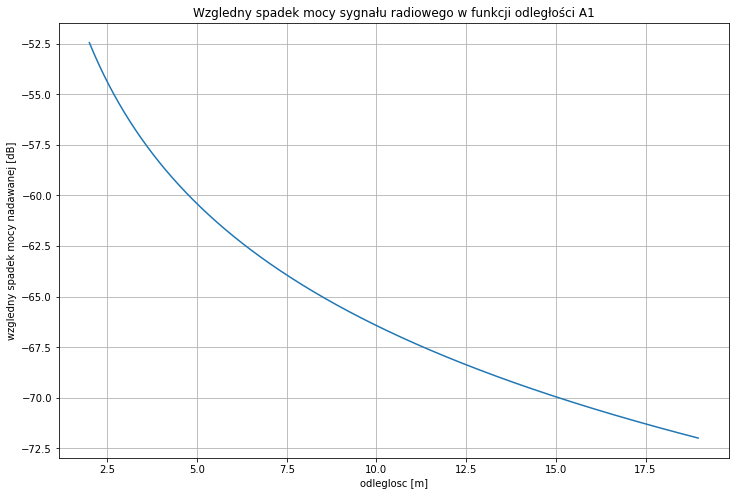

In [4]:
#plot
plt.figure(figsize=(12,8))
plt.title("Wzgledny spadek mocy sygnału radiowego w funkcji odległości A1")
plt.xlabel("odleglosc [m]")
plt.ylabel("wzgledny spadek mocy nadawanej [dB]")
plt.plot(d,PrPt)
#plt.plot(d,PrPt_)
plt.grid()

A.2
Wyznacz wykres tłumienia ścieżki, gdy istnieją także ścieżki odbite:
* 1D – od przeciwległej ściany
* 2D – od przeciwległej ściany i bocznych ścian
* 2.5 D – od przeciwległej ściany, bocznych ścian, podłogi i sufitu.
Współczynniki odbicia przyjmij według normy P.2040, Przenikalność elektryczną materiałów
budowlanych przyjmij także według normy (rodzaj materiałów dobierz samodzielnie).

In [5]:
#1D
ReTM = (er_wall - np.sqrt(er_wall))/(er_wall + np.sqrt(er_wall))
a_wall = ReTM #obliczenie współczynika odbicia od ściany
#print(a_wall)

dmin = 0
dmax = b-k

zakres=dmax - dmin
d0=np.arange(dmin, dmax+k, zakres/(lp-1),dtype=float)

fi1 = np.pi*(-2)*d0/c #faza bez odbicia 
fi2 = np.pi*(-2)*(2*b-d0)/c # faza z odbiciem od przeciwległej ściany

np.seterr(divide='ignore', invalid='ignore')

e1=np.exp(1j*fi1) 
e2=np.exp(1j*fi2) 
#print(d0)
PrPt1_ = np.abs(1/d0*e1 + a_wall/(2*b-d0)*e2)
PrPt1 = np.abs((1/d0*e1 + a_wall/(2*b-d0)*e2))
PrPt1 = 20*np.log10(PrPt1)


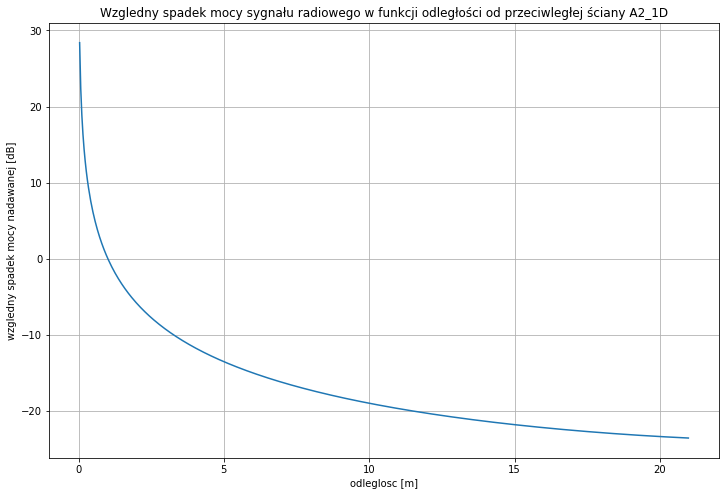

In [6]:
plt.figure(figsize=(12,8))
plt.title("Wzgledny spadek mocy sygnału radiowego w funkcji odległości od przeciwległej ściany A2_1D")
plt.xlabel("odleglosc [m]")
plt.ylabel("wzgledny spadek mocy nadawanej [dB]")
plt.plot(d0,PrPt1)
plt.grid()


In [7]:
#2D
#code
h1 = hA*np.ones(len(d0)) #wektor odbiciaq od ściany
d1=2*np.sqrt(np.power(h1,2)+(d0**2)/4)
fi3 = -2*np.pi*f*d0/c

e1=np.exp(1j*fi1)
e2=np.exp(1j*fi2)
e3=np.exp(1j*fi3)
#print(d0)
PrPt2 = np.abs((1/d0*e1 + a_wall/(2*b-d0)*e2 + a_wall/d1*e3))
PrPt2 = 20*np.log10(PrPt2)

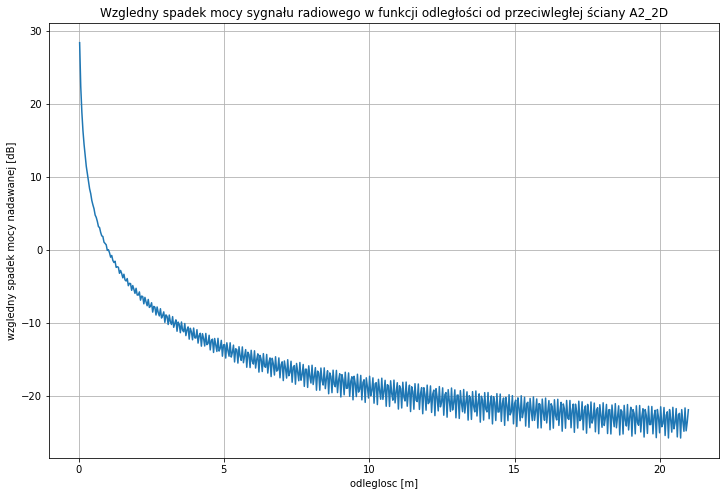

In [8]:
#plot
plt.figure(figsize=(12,8))
plt.title("Wzgledny spadek mocy sygnału radiowego w funkcji odległości od przeciwległej ściany A2_2D")
plt.xlabel("odleglosc [m]")
plt.ylabel("wzgledny spadek mocy nadawanej [dB]")
plt.plot(d0,PrPt2)
plt.grid()


A.3
Rozbudowałeś pokój o część o bokach 𝑏, 𝑎. Odbiornik porusza się w osi tej części
Wyznacz stratę dyfrakcji według metody Deygout. Przyjmij występowanie dyfrakcji wyłącznie, gdy
odbiornik nie ma bezpośredniej widoczności z nadajnikiem.
1D – wyznacz wartość straty dyfrakcji w osi dobudowanej części
2D, 2.5D – wyznacz wartość straty dyfrakcji w całej dobudowanej części

In [9]:
#PROJEKT

In [10]:
# BRUDNOPIS
a = 13 #[m]
b = 21 #[m]

np.arc



A.4
Kolejna rozbudowa, tak, aby pokój stał się symetryczną podkową.
Wyznacz wartość tłumienia ścieżki dla trzech wariantów radiowych:
A.4.1
Sygnał przenika przez dwie ściany i dociera do odbiornika
A.4.2
Sygnał ulega podwójnej dyfrakcji, modelowanej tym razem według metody Berga
A.4.3
Sygnał ulega kilkukrotnym odbiciom wynikającym z zasad geometrii.Oczekiwana ocena:
Dst – Wariant 1D
Db – wariant 2D
Bdb – wariant 2.5 D

A.5 Kreatywność jest w cenie! Rozwiń powyższy program według własnego pomysłu. Możesz dodać
odbicie od innego budynku (sygnał wychodzi i wraca prze okno), obudować ściany metalem, dodać
rozproszenie sygnału, policzyć wartości w przypadku wystąpienia deszczu monsunowego w pokoju,
etc…

A.6 (niezależne wobec części A.1-A.5)
Przyjmij układ budynków według siatki Manhattan. Dla wylosowanego rozkładem jednostajnym
położenia nadajnika, wyznacz wartość tłumienia ścieżki (w wariancie 2D, dla stałej wysokości
położenia odbiornika - według wybranego modelu propagacyjnego O2O:
Dst – mmMagic
Db – Winner II Model Urban Macro
Bdb – Winner II Model Urban Micro

    alpha (float) – przeźroczystość
    clip_box (bool) – włącz/wyłącz obramowanie
    clip_path (instancja Path) – ścieżka przecięcią z „Path”
    color lub c (kolor dostępny w matplotlib) – zmiana koloru
    contains (metoda testowania trafień) – funkcja oceniająca, czy wartości są w danym obrębie
    dash_capstyle ([’butt’ | ’round’ | 'projecting’]) – styl zakończeń dla linii przerywanych
    dash_joinstyle ([’miter’ | ’round’ | 'bevel’]) – styl zgięć wykresu dla linii przerywanych
    dashes (on/off) – efekt rozlanego tuszu
    label (string) – etykieta wyświetlana w legendzie
    linestyle or ls ([ ’-’ | ’–’ | ’-.’ | ’:’ | 'steps’ | …]) – styl wyświetlanej linii
    linewidth or lw (float) – szerokość linii
    marker ([ '+’ | ’,’ | ’.’ | '1′ | '2′ | '3′ | '4′ ]) – znacznik linii.
    markeredgecolor (kolor dostępny w matplotlib) – kolor krawędzi znacznika
    markeredgewidth or mew (float) – grubość krawędzi znacznika
    pickr (line) – linia przecinająca wykres (domyślnie pionowa)
    pickradius (radius) – kont pod jakim ma przechodzi linia plicker
    solid_capstyle ([’miter’ | ’round’ | 'bevel’]) – styl zakończeń dla linii ciągłych
    solid_joinstyle (instancja matplotlib.transforms.Transform) – styl zgięć wykresu dla linii ciągłych
    visible (bool) – włącz/wyłącz wyświetlanie linii
    xdata (np.array) – tablica danych dla osi x
    ydata (np.array) – tablica danych dla osi y
    zorder (any number) – przy wielu liniach na jednym wykresie, ustawienie kolejności wyświetlania. Czym najniższe numery są generowane jako pierwsze